In [1]:
from src.CLIP import CLIP
import torch
from src.io import Image_Text_Dataset
from src.Trainer import train_clip
import numpy as np
from torch.utils.data import DataLoader, random_split, ConcatDataset

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
illustris_tng_100_dataset1 = Image_Text_Dataset(fits_file='/d1/manth145/UVCANDELS/synthetic_images/hlsp_illustris_hst_acs_tng100-7-6-yxz_f814w_v1_sim.fits', cutout_size=64)

/home/manth145/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 28123/28123 [00:09<00:00, 2829.01it/s]


Found 28123 images with no NaNs


In [4]:
train_val_split = 0.9
batch_size = 32
nworkers = 8

dataloader = DataLoader(illustris_tng_100_dataset1, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=nworkers, persistent_workers=True)

In [5]:
something, condition = next(iter(dataloader))

In [6]:
# something.shape

In [5]:
model = CLIP(embed_dim=128, temperature=0.1)

trained_model = train_clip(model=model, device=device, train_loader = dataloader, 
                           learning_rate=1e-4, dest_folder='./checkpoints')

# #save the trained model
# torch.save(trained_model.state_dict(), 'clip_trained_model.pt')

/home/manth145/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/manth145/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([32, 64, 128])


../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [0,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [1,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [2,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [3,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [4,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread: [5,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [54,0,0], thread:

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# from transformers import CLIPTokenizer as HFCLIPTokenizer
# tokenizer = HFCLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32", force_download=True)

In [ ]:
# tokenizer("(P1:1.56), (P2:10.6)", padding="max_length", max_length = 64, truncation=True)

In [5]:
# tokenizer("(P1:1.), (P2:9.6)", padding="max_length", max_length = 64, truncation=True)

{'input_ids': [49406, 263, 335, 272, 281, 272, 13, 2361, 263, 335, 273, 281, 280, 269, 277, 264, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

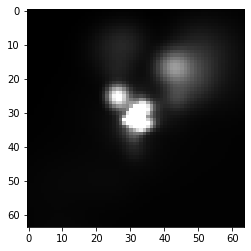

In [9]:
import matplotlib.pyplot as plt

plt.imshow(something[0,1,:,:].cpu().numpy(), cmap='gray')

plt.show()

In [11]:
dest_folder = './checkpoints/'

In [12]:
dest_folder.endswith('/')

True

In [1]:
condition.argmax(dim=-1)

NameError: name 'condition' is not defined

In [8]:
condition.argmax(dim=-1)

tensor([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 21, 21, 21,
        21, 21, 21, 21, 21, 20, 21, 21, 21, 20, 21, 22, 21, 20])

In [10]:
torch.index_select(condition, dim=1, index=condition.argmax(dim=-1)).shape

torch.Size([32, 64])

In [11]:
condition[torch.arange(32), condition.argmax(dim=-1)]

tensor([49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407], dtype=torch.int32)

In [7]:
some_random_tensor = torch.rand(32, 64, 128)

In [8]:
some_random_tensor.shape

torch.Size([32, 64, 128])

In [10]:
torch.index_select(some_random_tensor, dim=1, index=condition.argmax(dim=-1))[0]

torch.Size([32, 32, 128])

In [10]:
torch.index_select(some_random_tensor, dim=1, index=condition.argmax(dim=-1))[torch.arange(32)].shape

torch.Size([32, 32, 128])

In [9]:
some_random_tensor[torch.arange(32), (21*torch.ones(32)).to(torch.int32)].shape

torch.Size([32, 128])

In [8]:
for batch_idx, (images, tokens) in enumerate(dataloader):
    print(tokens.shape, tokens.argmax(dim=-1))
    
    if batch_idx>=100:
        break

torch.Size([32, 64]) tensor([21, 21, 21, 21, 21, 20, 20, 21, 21, 21, 22, 20, 21, 21, 21, 21, 20, 21,
        21, 21, 20, 22, 18, 20, 21, 21, 21, 21, 21, 21, 21, 20])
torch.Size([32, 64]) tensor([20, 20, 21, 21, 21, 21, 21, 20, 21, 21, 19, 22, 21, 20, 21, 21, 21, 19,
        21, 20, 20, 21, 21, 21, 21, 22, 21, 21, 21, 21, 21, 20])
torch.Size([32, 64]) tensor([21, 21, 21, 21, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 20, 21, 21, 21, 21, 21, 20, 19, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 21, 21, 21, 21, 21, 21, 21, 22, 20, 21, 21, 21, 21, 22, 22, 21, 21,
        21, 21, 19, 22, 21, 21, 21, 21, 21, 21, 20, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 21, 21, 20, 21, 21, 21, 21, 21, 21, 19, 20, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 20, 21, 21, 21, 20, 21, 21, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 20, 22, 21, 21, 21, 21, 21, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22,
        21, 21, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])
torc

torch.Size([32, 64]) tensor([21, 20, 21, 21, 21, 21, 20, 21, 21, 21, 21, 21, 20, 21, 21, 20, 20, 21,
        21, 21, 21, 21, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 22, 20, 21, 21, 19, 21, 20, 21, 21, 21, 21, 21, 22, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 22, 22, 21, 21, 21, 20, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 21, 21, 20, 21, 21, 21, 21,
        21, 21, 21, 21, 18, 21, 21, 20, 21, 21, 22, 21, 21, 20])
torch.Size([32, 64]) tensor([21, 21, 19, 21, 20, 21, 21, 21, 21, 21, 21, 21, 19, 21, 21, 21, 21, 21,
        20, 21, 21, 21, 21, 21, 21, 21, 21, 20, 21, 21, 21, 21])
torch.Size([32, 64]) tensor([21, 21, 21, 21, 21, 19, 21, 21, 21, 21, 21, 21, 20, 20, 21, 21, 20, 20,
        21, 21, 21, 21, 21, 21, 20, 20, 19, 21, 22, 19, 22, 21])
torch.Size([32, 64]) tensor([21, 21, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 21, 21, 20, 21, 21,
        21, 21, 20, 21, 21, 21, 21, 20, 21, 21, 20, 21, 20, 20])
torc

In [17]:
condition.argmax(dim=-1).to(torch.int32)

tensor([21, 21, 21, 21, 21, 20, 21, 21, 21, 21, 20, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 19, 22, 21, 21, 21, 21, 21, 20, 19],
       dtype=torch.int32)

In [7]:
np.save('test_data.npy', something.cpu().numpy())

In [8]:
np.save('test_data_text.npy', condition.cpu().numpy())